In [1]:
import wandb
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from dataclasses import dataclass
from typing import List, Tuple, Optional

In [2]:
def get_run_data(run, metric: str) -> pd.DataFrame:

    # Get all available history columns first
    history = list(run.scan_history())

    # Create steps DataFrame with only available columns
    requested_cols = ['Optimization Steps'] + [metric]
    
    steps = pd.DataFrame([
            {k: step.get(k) for k in requested_cols}
            for step in run.scan_history(requested_cols)
        ])
    
    # Create base DataFrame
    df = pd.DataFrame({
        metric: steps[metric].values,
    }, index=steps['Optimization Steps'])

    return df

def average_n_rows(df: pd.DataFrame, n: int) -> pd.DataFrame:
    # Reset index to preserve it in the grouping
    df_reset = df.reset_index()
    
    # Group by integer division of row numbers and aggregate
    # First column (index) takes first value, all other columns take mean
    agg_dict = {df_reset.columns[0]: 'first'}  # First column (former index)
    agg_dict.update({col: 'mean' for col in df_reset.columns[1:]})  # All other columns
    
    grouped = df_reset.groupby(df_reset.index // n).agg(agg_dict)
    
    # Restore the index column name and set it back as index
    return grouped.set_index(df_reset.columns[0])

In [3]:
api = wandb.Api()


In [4]:
run = api.run("philliplakaschus/grokking/qv7ntoi1")

In [15]:
training_loss_df = get_run_data(run, "training/loss")
grads_abs_df = get_run_data(run, "gradients/total_abs_sum")

In [6]:
training_loss_df.head()

,training/loss
Optimization Steps,
3,4.716122
6,4.633337
9,4.642342
12,4.576187
15,4.602345


In [13]:
training_loss_df_avg = average_n_rows(training_loss_df, 6000)

<Axes: xlabel='Optimization Steps'>

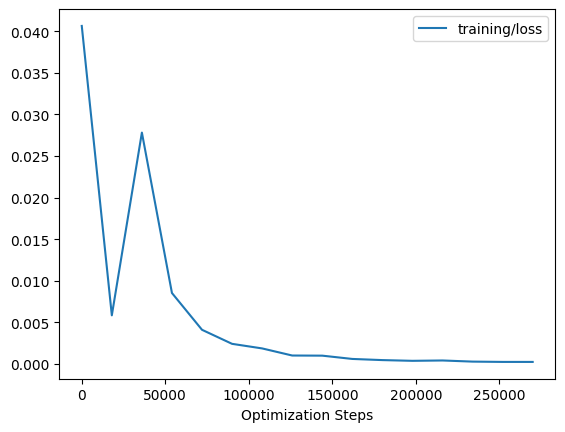

In [14]:
training_loss_df_avg.plot()